In [1]:
import numpy as np
from sklearn.metrics import classification_report, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cross_validation import train_test_split

import pandas as pd
from pickle import load, dump

from keras import metrics
import keras.backend as K
from keras.layers import *
from keras.layers.core import *
from keras.layers.recurrent import *
from keras.layers.merge import *
from keras.layers.convolutional import *
from keras.layers.embeddings import *
from keras.layers.wrappers import *
from keras.layers.normalization import *
from keras.layers.advanced_activations import *
from keras.models import *
from keras.callbacks import *
from keras.utils.vis_utils import *
from keras.utils import *

from IPython.display import SVG
import matplotlib.pyplot as plt

/home/wooya/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [16]:
def read_data(path):
    Xs, Ys = pd.read_pickle(path)
    

    Xtrain, Xvalid, Xtest = Xs[:,:5725], Xs[:,5725:5725*2], Xs[:,5725*2:]
    Xtrain, Xvalid, Xtest = Xtrain.reshape(-1, *Xtrain.shape[2:]), Xvalid.reshape(-1, *Xvalid.shape[2:]), Xtest.reshape(-1, *Xtest.shape[2:])
    
    Ytrain, Yvalid, Ytest = Ys[:,:5725], Ys[:,5725:5725*2], Ys[:,5725*2:]
    Ytrain, Yvalid, Ytest = Ytrain.reshape(-1), Yvalid.reshape(-1), Ytest.reshape(-1)
    Ytrain, Yvalid, Ytest = to_categorical(Ytrain), to_categorical(Yvalid), to_categorical(Ytest)
    return Xtrain, Xvalid, Xtest, Ytrain, Yvalid, Ytest

In [20]:
num_marks = 5
length_bin = 100
num_filters = 50
length_filter = 10
length_pool = 5
length_full_1 = 625
length_full_2 = 125

In [17]:
Xtrain, Xvalid, Xtest, Ytrain, Yvalid, Ytest = read_data("../data/input.pkl")


In [18]:
print(f"train, X size: {Xtrain.shape}, Y size: {Ytrain.shape}")
print(f"test, X size: {Xtest.shape}, Y size: {Ytest.shape}")

train, X size: (91600, 100, 5), Y size: (91600, 2)
test, X size: (91616, 100, 5), Y size: (91616, 2)


# Model definition

In [25]:
%%time 
# channel last
input_shape = (length_bin, num_marks)
input = Input(shape=input_shape)

nn = Conv1D(num_filters, length_filter, padding='same', activation="relu")(input)
nn = MaxPooling1D(length_pool, strides=length_pool, padding='same')(nn)
nn = Dropout(0.5)(nn)
nn = Flatten()(nn)
nn = Dense(length_full_1, activation="relu")(nn)
nn = Dense(length_full_2, activation="relu")(nn)
nn = Dense(2, activation="softmax")(nn)


clf = Model(inputs=input, outputs=nn)
clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

CPU times: user 184 ms, sys: 0 ns, total: 184 ms
Wall time: 184 ms


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 5)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 50)           2550      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 20, 50)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 625)               625625    
_________________________________________________________________
dense_5 (Dense)              (None, 125)               78250     
__________

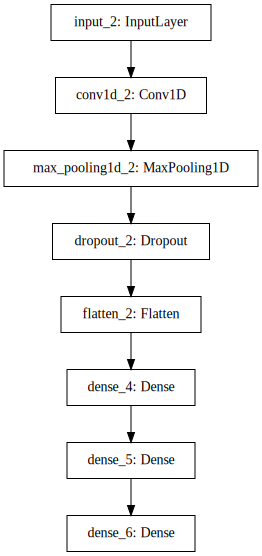

In [26]:
clf.summary()
SVG(model_to_dot(clf).create(prog='dot', format='svg'))

In [27]:
run_name = "deepchrome real 1"
tb = TensorBoard(log_dir=f"../log/{run_name}", batch_size=32, write_graph=True)
checkpointer = ModelCheckpoint(filepath=f"../model/{run_name}.h5", verbose=1, save_best_only=True, monitor="val_acc")
stopper = EarlyStopping(monitor="val_acc", patience=3)

In [ ]:
clf.fit(
    Xtrain,
    Ytrain,
    batch_size=2000,
    callbacks = [tb, checkpointer],
    epochs=1000,
    shuffle=True,
    validation_data=(Xvalid, Yvalid),
    verbose=0)

Epoch 00000: val_acc improved from -inf to 0.52090, saving model to ../model/deepchrome real 1.h5
Epoch 00001: val_acc did not improve
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc improved from 0.52090 to 0.52231, saving model to ../model/deepchrome real 1.h5
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
